# Full credit to: _"Hands-on machine Learning with scikit-learn & tensorflow"_ 
## All the code is from the third chapter
** This is created for a school project. 2017/09/15**


In [45]:
import numpy as np
import pandas as pd

In [46]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [47]:
X,y = mnist['data'],mnist['target']

In [48]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [49]:
some_digit = X[36000]
some_digit = some_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

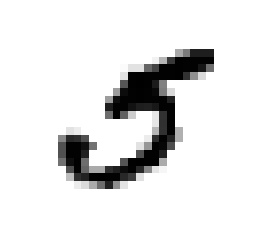

In [50]:
plt.imshow(some_digit, cmap=matplotlib.cm.binary,
          interpolation = 'nearest')
plt.axis('off')

In [51]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [52]:
shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index], y_train[shuffle_index]

In [53]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test==5)

In [54]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [55]:
sgd_clf.predict(X[36000])

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ True], dtype=bool)

# Costum cross validation function

In [56]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9653
0.94435
0.84985


In [57]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5, cv=4,scoring='accuracy')

array([ 0.96493567,  0.9586    ,  0.96653333,  0.91126075])

90% accuracy - not good. 90% of images are not 5 so by gueesing that the image is not 5 you will be right 90% of the time. Accuracy is not a good way of evaluating performance if the data set i skewed. 

In [58]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train,y_train_5, cv=3)

In [59]:
y_train_pred

array([False, False, False, ..., False, False, False], dtype=bool)

In [60]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53528,  1051],
       [ 1351,  4070]])

In [61]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.79476664713923062

In [62]:
recall_score(y_train_5, y_train_pred)

0.75078398819406011

In [63]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.77214949724909876

In [64]:
y_scores = sgd_clf.decision_function(X[36000])
y_scores

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 103286.65675275])

In [65]:
threshold = 0

y_scores_pred = (y_scores>threshold)
y_scores_pred

array([ True], dtype=bool)

In [66]:
y_scores = cross_val_predict(sgd_clf,X_train, y_train_5,cv=3,
                            method='decision_function')

In [67]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

NameError: name 'save_fig' is not defined

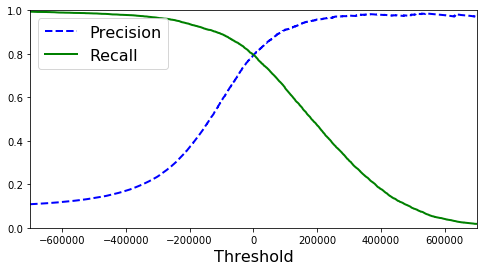

In [68]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [ ]:
y_train_pred_90 = (y_scores>70000)

In [ ]:
precision_score(y_train_5,y_train_pred_90)

In [ ]:
recall_score(y_train_5,y_train_pred_90)

In [ ]:
from sklearn.metrics import roc_curve 

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3, method = 'predict_proba')

In [ ]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [ ]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc='lower right')

In [ ]:
some_digit = X[36000]
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

In [ ]:
sgd_clf.decision_function([some_digit])

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

In [ ]:
cross_val_score(ovo_clf, X_train, y_train,cv=3,scoring='accuracy')

In [ ]:
y_train_pred = cross_val_predict(sgd_clf,X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

In [ ]:
plt.matshow(conf_mx,cmap=plt.cm.gray)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train>=7)
y_train_od = (y_train%2==1)
y_multiplabel = np.c_[y_train_large, y_train_od]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multiplabel)

In [ ]:
noise = np.random.randint(0,100, (len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100, (len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test